In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [105]:
!pip install fredapi > /dev/null

In [106]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred_key")

# 1. Create the fred object

In [107]:
fred = Fred(api_key=fred_key)

# 2. Search Fred
## Question 1: What are the series results from the S&P ordered by popularity? Filter these results by observation start date of after the year 2000, and make sure that the results are Annual, not monthly or daily. This will help identify which data sets I want to work with.

In [108]:
sp_search = fred.search('S&P', order_by='popularity')

In [132]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-10-28,2023-10-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-10-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-27 09:23:01-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-10-28,2023-10-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-10-28,2023-10-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-10-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-27 09:23:06-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-10-28,2023-10-28,S&P 500,2013-10-28,2023-10-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-10-27 19:11:02-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-10-28,2023-10-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-10-28,2023-10-28,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01VEA156NWDB,DDEM01VEA156NWDB,2023-10-28,2023-10-28,Stock Market Turnover Ratio (Value Traded/Capi...,1993-01-01,2002-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:40-05:00,3,Total value of shares traded during the period...
DDEM01ECA156NWDB,DDEM01ECA156NWDB,2023-10-28,2023-10-28,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2000-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:42-05:00,3,Total value of shares traded during the period...


In [110]:
#result[5] = obervational start
#result[8] = frequency_short
sp_search_filtered = sp_search[(sp_search['frequency_short'] == 'A') & (sp_search['observation_start'] >= '2000-01-01')]


In [133]:
sp_search_filtered

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DDDM01CNA156NWDB,DDDM01CNA156NWDB,2023-10-28,2023-10-28,Stock Market Capitalization to GDP for China,2003-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:47:02-05:00,30,Total value of all listed shares in a stock ma...
DDDM01INA156NWDB,DDDM01INA156NWDB,2023-10-28,2023-10-28,Stock Market Capitalization to GDP for India,2000-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:47:03-05:00,22,Total value of all listed shares in a stock ma...
GCT1502AL,GCT1502AL,2023-10-28,2023-10-28,Bachelor's Degree or Higher for Alabama,2006-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-09-14 12:38:02-05:00,20,Estimate of educational attainment for populat...
HC01ESTVC1706037,HC01ESTVC1706037,2023-10-28,2023-10-28,Bachelor's Degree or Higher (5-year estimate) ...,2010-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:43:05-06:00,14,Estimate of educational attainment for populat...
GCT1502CA,GCT1502CA,2023-10-28,2023-10-28,Bachelor's Degree or Higher for California,2006-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-09-14 12:38:03-05:00,10,Estimate of educational attainment for populat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1501ACSTOTAL039173,S1501ACSTOTAL039173,2023-10-28,2023-10-28,People 25 Years and Over Who Have Completed an...,2009-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:44:32-06:00,3,Estimate of educational attainment for populat...
S1501ACSTOTAL053077,S1501ACSTOTAL053077,2023-10-28,2023-10-28,People 25 Years and Over Who Have Completed an...,2009-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:41:40-06:00,3,Estimate of educational attainment for populat...
DDDI01RUA156NWDB,DDDI01RUA156NWDB,2023-10-28,2023-10-28,Private Credit by Deposit Money Banks to GDP f...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:49:55-05:00,3,The financial resources provided to the privat...


# I decided that none of those resultant series were interesting to me, so I am defaulting back to using the S&P 500

In [116]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

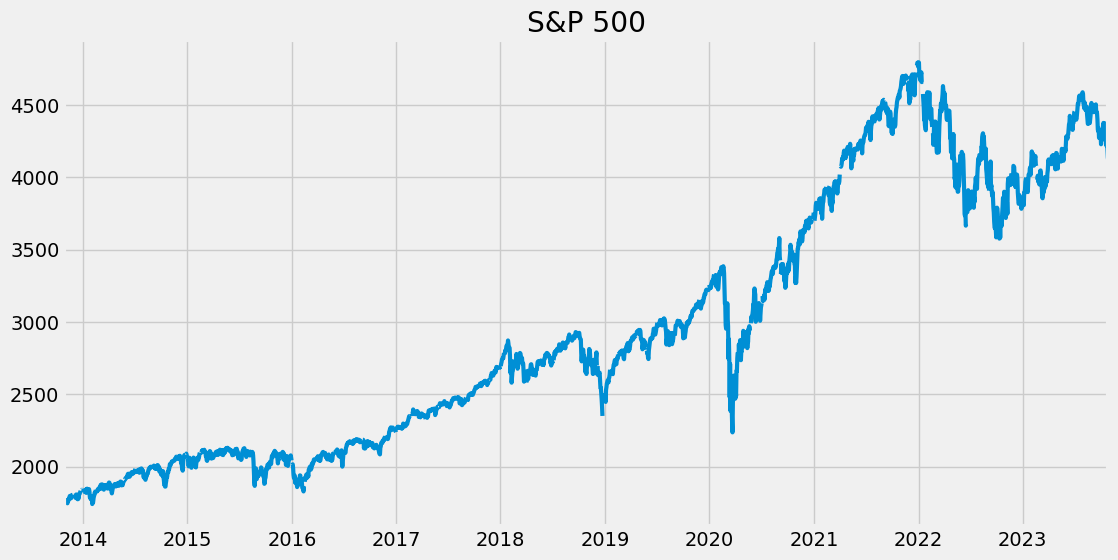

In [118]:
sp500.plot(figsize=(12,6), title='S&P 500', lw=3)

In [119]:
unemployment_results = fred.search('unemployment')

In [121]:
# Grabbing the unemployement rate in carlsbad / San diego area (That is where I grew up)
unrate_SD = fred.get_series('SAND706URN')

<Axes: >

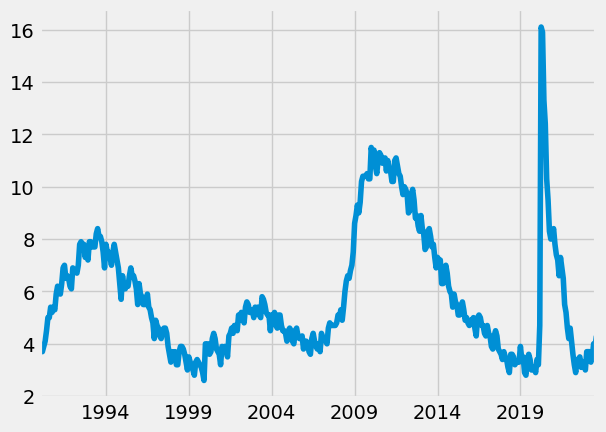

In [134]:
unrate_SD.plot()

In [135]:
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-28,2023-10-28,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-10-28,2023-10-28,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-10-06 07:45:02-05:00,55,The unemployment rate represents the number of...
NROU,NROU,2023-10-28,2023-10-28,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,67,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-10-28,2023-10-28,Continued Claims (Insured Unemployment),1967-01-07,2023-10-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-10-26 07:33:04-05:00,73,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-10-28,2023-10-28,Unemployment Level,1948-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:04-05:00,69,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAND706URN,SAND706URN,2023-10-28,2023-10-28,"Unemployment Rate in San Diego-Carlsbad, CA (MSA)",1990-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 10:26:05-05:00,2,None
LNU04027689,LNU04027689,2023-10-28,2023-10-28,Unemployment Rate - Some College or Associate ...,1992-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-10-06 07:45:41-05:00,1,The series comes from the 'Current Population ...
LNU03023621,LNU03023621,2023-10-28,2023-10-28,Unemployment Level - Job Losers,1967-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2023-10-06 07:45:44-05:00,1,The series comes from the 'Current Population ...


In [125]:
# Create a DataFrame for the S&P 500 and unemployment rate data
data = pd.DataFrame({'S&P 500': sp500, 'Unemployment Rate SD': unrate_SD})

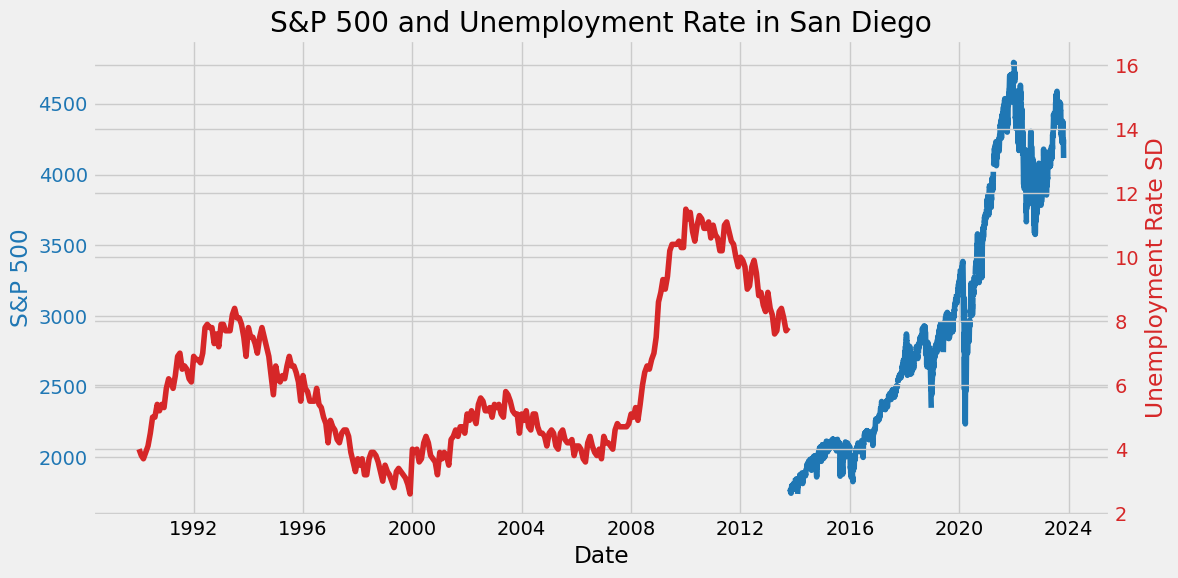

Correlation between S&P 500 and Unemployment Rate SD: -0.08


In [126]:
# Plot both datasets on the same chart
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500', color=color)
ax1.plot(data.index, data['S&P 500'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('S&P 500 and Unemployment Rate in San Diego')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate SD', color=color)
ax2.plot(data.index, data['Unemployment Rate SD'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # ensure the right y-label is slightly clipped

plt.show()

# Calculate the correlation between S&P 500 and Unemployment Rate
correlation = data['S&P 500'].corr(data['Unemployment Rate SD'])
print(f'Correlation between S&P 500 and Unemployment Rate SD: {correlation:.2f}')

# Since the correlation is -0.08, it is not a strong correlation at all.

# Question 2: How many data points are in the two data series?

In [130]:
# Create a DataFrame for the S&P 500 data
data = pd.DataFrame({'S&P 500': sp500})

# Calculate the number of data points in the dataset
data_count = data['S&P 500'].count()

# Display the count of data points
print(f'Number of Data points in Unemployment Rate SD: {data_count}')

Number of Data points in Unemployment Rate SD: 2518


In [131]:
# Create a DataFrame for the unemployment data
data = pd.DataFrame({'Unemployment Rate SD': unrate_SD})

# Calculate the number of data points in the dataset
data_count = data['Unemployment Rate SD'].count()

# Display the count of data points
print(f'Number of Data Points in Unemployment Rate SD: {data_count}')

Number of Data Points in Unemployment Rate SD: 404
